## Decision Trees
In this competion and indeed any kaggle competiton you will most likely use a decision tree algorithm.  The most succesful and widely spread non-deep learning machine learning algorithms are based on decision trees.  Random Forests, Gradient Boosting, LightGBM are all at heart decision trees.  To be a success in data science and machine learning you should have a fundamental understanding of the basics of decision trees.  This short notebook will give you an intuitive understanding of how they work under the hood.  It focuses on two key issues; how they make their decisions and overfitting.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
import numpy
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


## Binary Decision Trees
Binary decision trees operate by subjecting attributes to a series of binary (yes/no) decisions. Each decision leads to one of two possibilities. Each decision leads to another decision or it leads to prediction.
Any block diagram of a trained tree shows a number of boxes, which are called `nodes`. There are two types of nodes: Nodes can either pose a yes/no question of the data, or they can be terminal nodes that assign a prediction to examples that end up in them. Terminal nodes are often referred to as `leaf` nodes. 

When an observation or row is passed to a nonterminal node, the row answers the node’s question. If it answers yes, the row of attributes is passed to the leaf node below and to the left of the current node. If the row answers no, the row of attributes is passed to the leaf node below and to the right of the current node.  The process continues recursively until the row arrives at a terminal (that is, leaf) node where a prediction value is assigned to the row. The value assigned by the leaf node is the mean of the outcomes of the all the training observations that wound up in the leaf node.

## How to Train a Binary Decision Tree
Lets look at a simple example.  We can create a dataset of 101 points `x` of values between -0.5 and 0.5, the labels y are equal to x with some random noise added.  This dataset is shown as Figure 1 below. 

In [3]:
#Build a simple data set with y = x + random
nPoints = 100
#x values for plotting
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints + 1)]
#x needs to be list of lists.
x = [[s] for s in xPlot]
#y (labels) has random noise added to x-value
#set seed
numpy.random.seed(1)
y = [s + numpy.random.normal(scale=0.1) for s in xPlot]

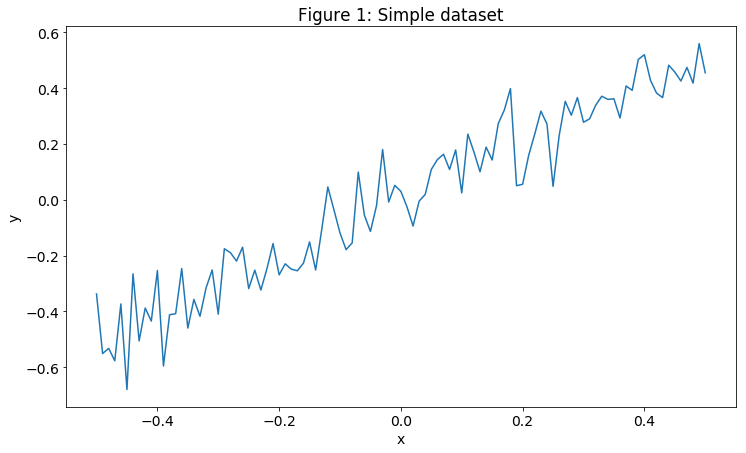

In [4]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (12.0, 7.0)
plt.plot(xPlot,y)
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1: Simple dataset')
plt.show()

From Figure 1 we can see that that y follows x with some random noise added.

## Generate a Tree
Using scikit learn regression tree package we can generate a simple tree with depth of 1 with the following code.





In [5]:
simpleTree = DecisionTreeRegressor(max_depth=1)
simpleTree.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

A block diagram of the resulting tree is shown below.  The single decision at the root node is to compare the attribute value with -0.075. This number is called the `split` point because it splits the data into two groups. The two boxes that emanate from the decision indicate that 43 of the 101 input examples go down the left leg of the tree, and the remaining 58 examples go down the right leg. If the attribute is less than the split point, the prediction from the tree is what’s indicated as value in the block diagram—roughly –0.303. 

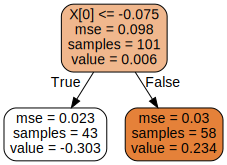

In [6]:
#draw the decision tree result with graphviz
dot_data = export_graphviz(simpleTree,out_file = None,rounded = True,filled = True)
graph = graphviz.Source(dot_data)
graph.render() 
graph

Because the simple synthetic problem has a single attribute only, the plot of the prediction generated by the trained tree alongside the actual values begins to give an idea about how the training of this simple tree was accomplished. The predicted values shown in Figure 2 below.  The prediction is a step function of the attribute. 

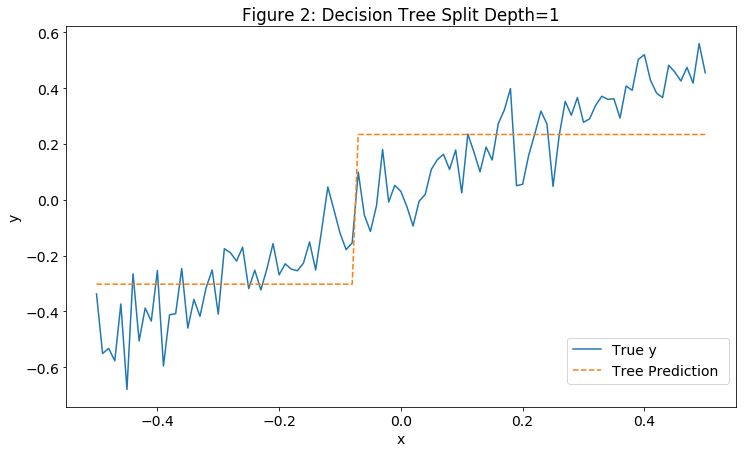

In [7]:
#compare prediction from tree with true values
yHat = simpleTree.predict(x)
plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--');
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 2: Decision Tree Split Depth=1')
plt.show()

## Increasing the Depth of the Tree
We can increase the depth of the tree to 2 and repeat the above figures.  It shows what happens to the prediction curve as the tree depth increases from 1 to 2 by again using scikit learn.  

In [8]:
simpleTree2 = DecisionTreeRegressor(max_depth=2)
simpleTree2.fit(x, y);

The resulting prediction curves are shown in Figure 3, and the block diagram for the tree is shown below.   Instead of having a single step, the prediction curve now has three steps. The second set of split points is determined in the same manner as the first one. Each node in the tree deals with the subset of points determined by the splits above it. The split point for each node is determined to minimize the sum squared error in the two nodes below

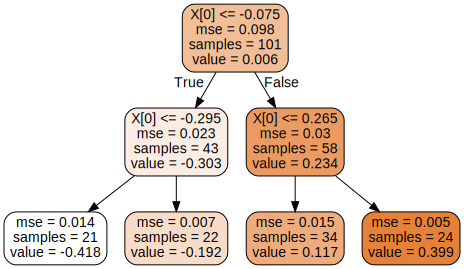

In [9]:
#draw the tree
dot_data = export_graphviz(simpleTree2,out_file = None,rounded = True,filled = True)
graph = graphviz.Source(dot_data)
graph.render() 
graph

 The curve in Figure 3 approximates the actual curve with a finer stairstep function. **More tree depth results in finer steps and higher fidelity to the training data.**

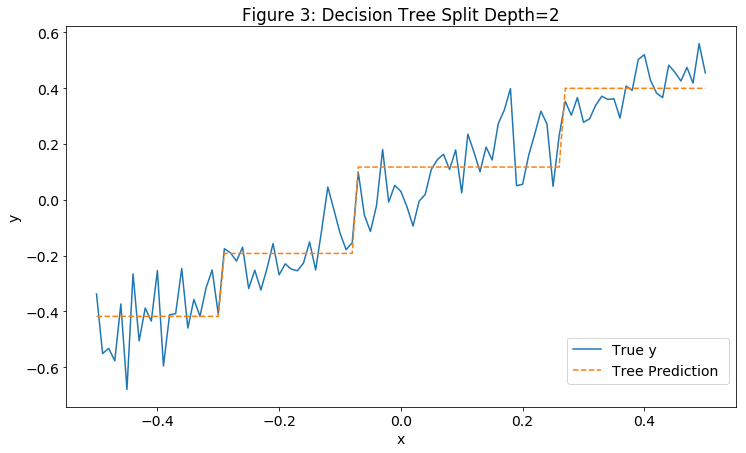

In [10]:
#compare prediction from tree with true values
yHat = simpleTree2.predict(x)
plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 3: Decision Tree Split Depth=2')
plt.show()

## Selecting Split Points
**How are the split points selected?**

The tree is trained to minimize the squared error of its predictions. Suppose first that the split point is given. Once the split point is given, the values assigned to the two groups are also determined. The
average of each group is the single quantity that minimizes the mean squared error. That only leaves the question of how the split point is determined. the listing below small section of code that goes through the process of determining the split. **The process is to try every possible split point. This is accomplished by dividing the data into two groups, approximating each group by its average, and then
calculating the resulting sum squared error.**


In [11]:
#split point calculations - try every possible split point to
#find the best one
sse = []
xMin = []
for i in range(1, len(xPlot)):
     #divide list into points on left and right of split point
     lhList = list(xPlot[0:i])
     rhList = list(xPlot[i:len(xPlot)])
     #calculate averages on each side
     lhAvg = sum(lhList) / len(lhList)
     rhAvg = sum(rhList) / len(rhList)
     #calculate sum square error on left, right and total
     lhSse = sum([(s - lhAvg) * (s - lhAvg) for s in lhList])
     rhSse = sum([(s - rhAvg) * (s - rhAvg) for s in rhList])
     #add sum of left and right to list of errors
     sse.append(lhSse + rhSse)
     xMin.append(max(lhList))

Figure 4 below shows how the sum squared error varies as a function of the split point location. As you can see, there’s a well-defined minimum at roughly the midpoint of the data set. **Training a decision tree entails exhaustively searching all possible split points to determine which one minimizes the sum squared error.** 

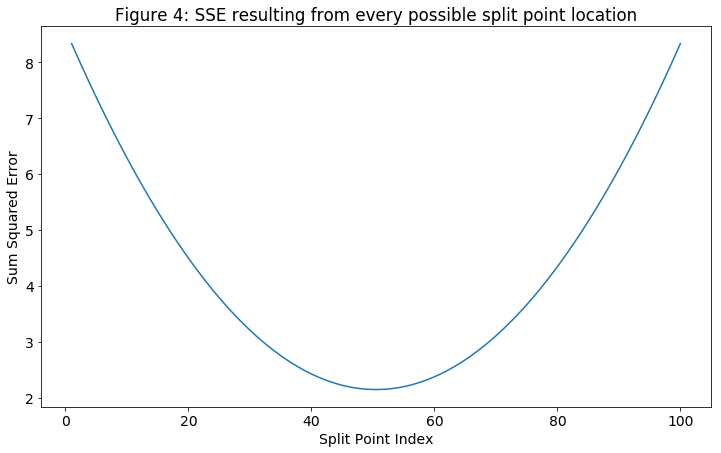

In [12]:
#SSE is sum of squared error
plt.plot(range(1, len(xPlot)), sse)
plt.xlabel('Split Point Index')
plt.ylabel('Sum Squared Error')
plt.title('Figure 4: SSE resulting from every possible split point location')
plt.show()

In [13]:
#minSse = min(sse)
#idxMin = sse.index(minSse)
#print(xMin[idxMin])

## Multivariable Tree Training
What if the problem has more than one attribute? Then the algorithm checks all possible split points for all of the attributes to see which split point gives the best sum squared error for each attribute and then which attributes gives the overall minimum.  This split point calculation is where all the computation cycles go in training a decision tree.

## Overfitting with Decision Trees
Figure 5 shows what happens when the tree depth is increased to 6. In Figure 5, it’s hard to see the difference between the true value and the
prediction. **The prediction follows almost every zig and zag. That begins to suggest that the model is overfitting the data**. The way the data were generated indicates that the best possible prediction would be for the prediction to equal the attribute value. The noise that was added to the attribute is unpredictable, and yet the prediction is following the noise-driven deviations of the label from the attribute. 

In [14]:
#increase the depth to 6
simpleTree6 = DecisionTreeRegressor(max_depth=6)
simpleTree6.fit(x, y);

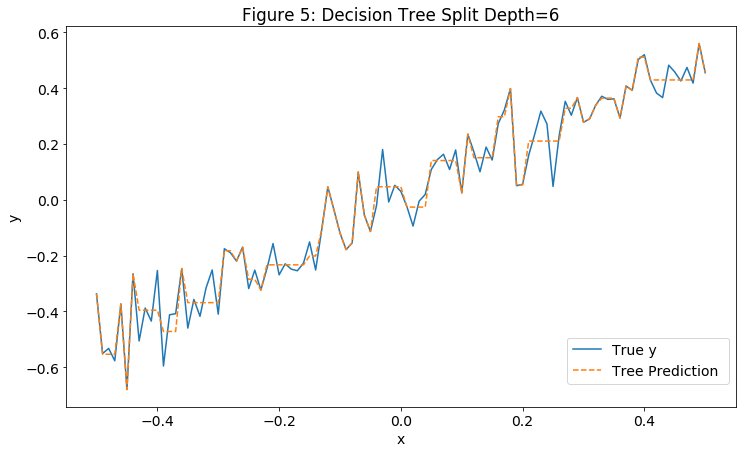

In [15]:
#compare prediction from tree with true values
yHat = simpleTree6.predict(x)
plt.figure()
plt.plot(xPlot, y, label='True y')
plt.plot(xPlot, yHat, label='Tree Prediction ', linestyle='--')
plt.legend(bbox_to_anchor=(1,0.2))
plt.axis('tight')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 5: Decision Tree Split Depth=6')
plt.show()

Another way to look at overfitting with a binary tree is to consider the number of terminal nodes in the tree compared to the amount of data available. The tree that generated the prediction shown in Figure 5 was depth 6. That means that it has 64 terminal nodes (2^6). There are 100 points in the dataset. That means a lot of the points are the sole occupants of a terminal node, so their predicted value exactly matches their observed value. **Therefore the graph of the prediction is matching the wiggles due to noise.**

## Summary
This notebook has discussed the basics of the most important non-deep learning algorithms - decision trees.  It has demonstarted in basic terms how split points are detemined and shown one the drawbacks of decsion trees - overfitting.

If you found this interesting please upvote and I will produce further tutorials



## References
Machine Learning in Python - Michael Bowles
